# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=f71104128101d2399f271e8dfe75b976&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camana
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | vadso
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | aljezur
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | yerofey pavlovich
Processing Record 15 of Set 1 | lincheng
Processing Record 16 of Set 1 | galliano
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | coos bay
Processing Record 22 of Set 1 | taio

City not found. Skipping...
Processing Record 38 of Set 4 | chonchi
Processing Record 39 of Set 4 | sinop
Processing Record 40 of Set 4 | banda aceh
Processing Record 41 of Set 4 | aasiaat
Processing Record 42 of Set 4 | meadow lake
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | lovisa
Processing Record 45 of Set 4 | bonthe
Processing Record 46 of Set 4 | desarmes
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | bereznik
Processing Record 49 of Set 4 | tonganoxie
Processing Record 0 of Set 5 | isafjordur
Processing Record 1 of Set 5 | nogliki
Processing Record 2 of Set 5 | espiye
Processing Record 3 of Set 5 | vallenar
Processing Record 4 of Set 5 | suoyarvi
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | palmer
Processing Record 7 of Set 5 | mount pearl
Processing Record 8 of Set 5 | lockwood
Processing Record 9 of Set 5 | kirakira
Processing Record 10 of Set 5 | callao
Pro

Processing Record 29 of Set 8 | suyan
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | jianshui
Processing Record 32 of Set 8 | auki
Processing Record 33 of Set 8 | grants
Processing Record 34 of Set 8 | estacion coahuila
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | zavetnoye
Processing Record 37 of Set 8 | ardahan
Processing Record 38 of Set 8 | suomussalmi
Processing Record 39 of Set 8 | karasburg
Processing Record 40 of Set 8 | thai binh
Processing Record 41 of Set 8 | sligo
Processing Record 42 of Set 8 | hilo
Processing Record 43 of Set 8 | warren
Processing Record 44 of Set 8 | kultali
City not found. Skipping...
Processing Record 45 of Set 8 | labasa
Processing Record 46 of Set 8 | victorica
Processing Record 47 of Set 8 | san juan de miraflores
Processing Record 48 of Set 8 | mvomero
Processing Record 49 of Set 8 | dellys
Processing Record 0 of Set 9 | las khorey
Processing Record 1 of Set 9 | kalmunai
Processing Record 2 of Set

Processing Record 18 of Set 12 | nuku'alofa
Processing Record 19 of Set 12 | wenling
Processing Record 20 of Set 12 | bel ombre
Processing Record 21 of Set 12 | buri ram
Processing Record 22 of Set 12 | kalinkavichy
Processing Record 23 of Set 12 | spanish wells
Processing Record 24 of Set 12 | ouallam
Processing Record 25 of Set 12 | yoko
Processing Record 26 of Set 12 | samitah
Processing Record 27 of Set 12 | cadale
Processing Record 28 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 29 of Set 12 | birao
Processing Record 30 of Set 12 | lerwick
Processing Record 31 of Set 12 | kotel'va
Processing Record 32 of Set 12 | ceeldheer
Processing Record 33 of Set 12 | hovd
Processing Record 34 of Set 12 | belyy yar
Processing Record 35 of Set 12 | papao
Processing Record 36 of Set 12 | richards bay
Processing Record 37 of Set 12 | campbell river
Processing Record 38 of Set 12 | stephenville
Processing Record 39 of Set 12 | hafar al-batin
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0             camana -16.6228  -72.7111     16.05        83          14   
1  port-aux-francais -49.3500   70.2167      0.58        64          81   
2            ushuaia -54.8000  -68.3000      1.22        94         100   
3       invercargill -46.4000  168.3500      7.23        92         100   
4          adamstown -25.0660 -130.1015     19.76        65           6   

   Wind Speed Country        Date  
0        4.92      PE  1726362491  
1       15.52      TF  1726362492  
2        4.34      AR  1726362494  
3        0.89      NZ  1726362495  
4        5.92      PN  1726362496

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
#city_data_df = pd.to_numeric(city_data_df['Lat'])

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0                   camana -16.6228  -72.7111     16.05        83          14   
1        port-aux-francais -49.3500   70.2167      0.58        64          81   
2                  ushuaia -54.8000  -68.3000      1.22        94         100   
3             invercargill -46.4000  168.3500      7.23        92         100   
4                adamstown -25.0660 -130.1015     19.76        65           6   

         Wind Speed Country        Date  
City_ID                                  
0              4.92      PE  1726362491  
1             15.52      TF  1726362492  
2              4.34      AR  1726362494  
3              0.89      NZ  1726362495  
4              5.92      PN  1726362496

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

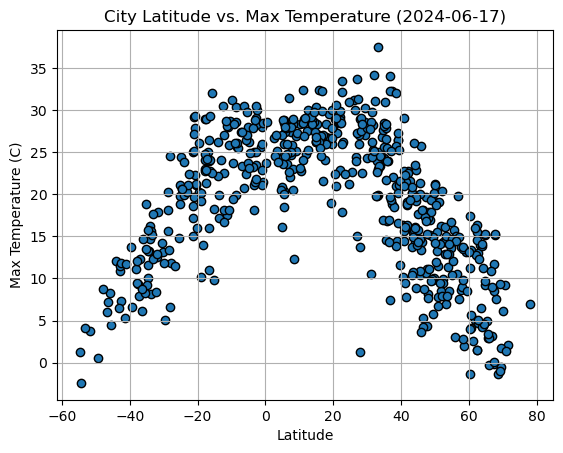

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-17)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

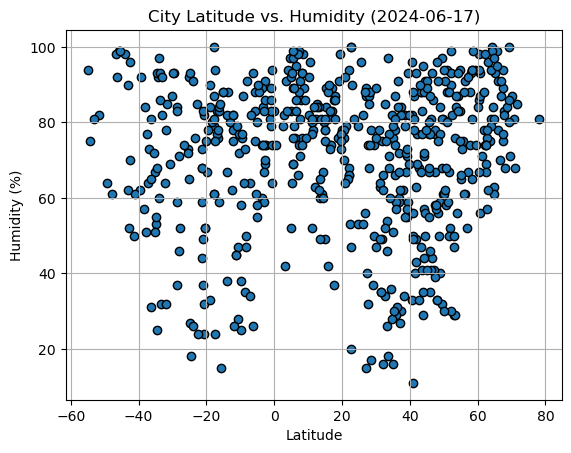

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

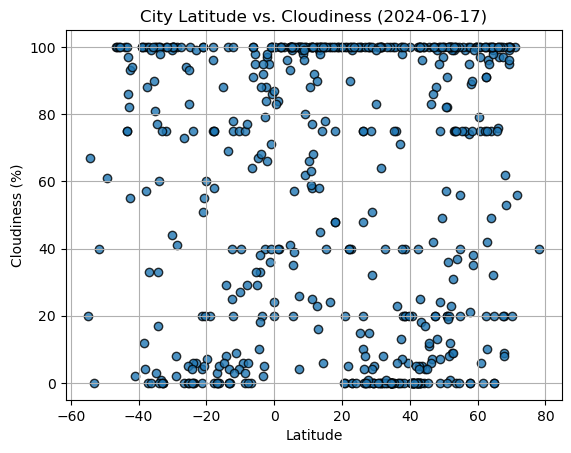

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

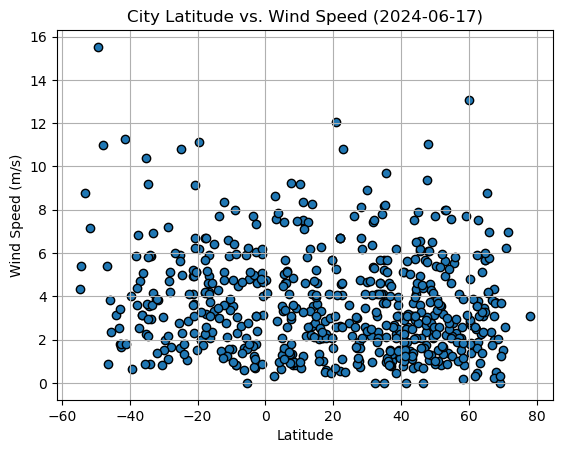

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
from sklearn import datasets
# Define a function to create Linear Regression plots
#x_values = df['']
#y_values = df['']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Rooms in House')
#plt.ylabel('Median House Prices ($100,000)')
#print(f"The r-squared is: {rvalue**2}")
#plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
6             vadso  70.0744   29.7487      6.09        87         100   
7          thompson  55.7435  -97.8558     15.71        75         100   
8        constantia  44.1833   28.6500     14.38        57          83   
9        whitehorse  60.7161 -135.0538     13.39        56          83   
10          aljezur  37.3191   -8.8033     18.82        84           8   

         Wind Speed Country        Date  
City_ID                                  
6              1.54      NO  1726362499  
7              5.53      CA  1726362500  
8              5.72      RO  1726362501  
9              2.68      CA  1726362503  
10             1.03      PT  1726362504

In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0                   camana -16.6228  -72.7111     16.05        83          14   
1        port-aux-francais -49.3500   70.2167      0.58        64          81   
2                  ushuaia -54.8000  -68.3000      1.22        94         100   
3             invercargill -46.4000  168.3500      7.23        92         100   
4                adamstown -25.0660 -130.1015     19.76        65           6   

         Wind Speed Country        Date  
City_ID                                  
0              4.92      PE  1726362491  
1             15.52      TF  1726362492  
2              4.34      AR  1726362494  
3              0.89      NZ  1726362495  
4              5.92      PN  1726362496

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.588885747266255


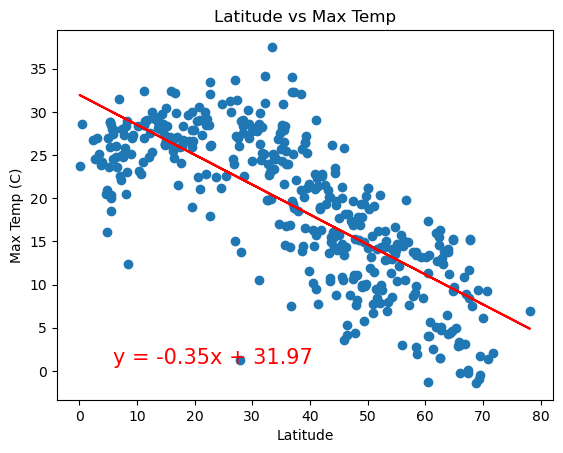

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.679592533948813


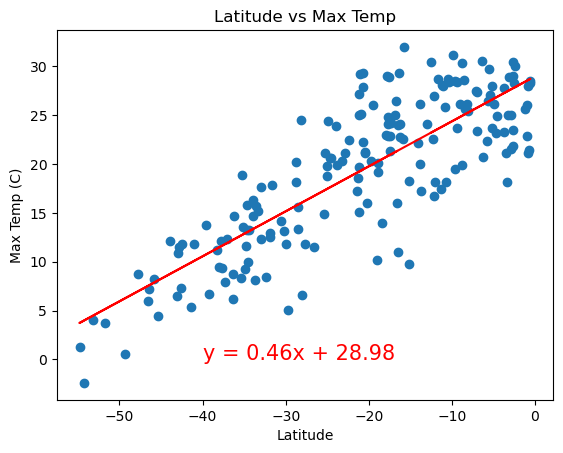

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Temperature is highest at Zero Latitude, and lower when latitude changes

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00031766607636031307


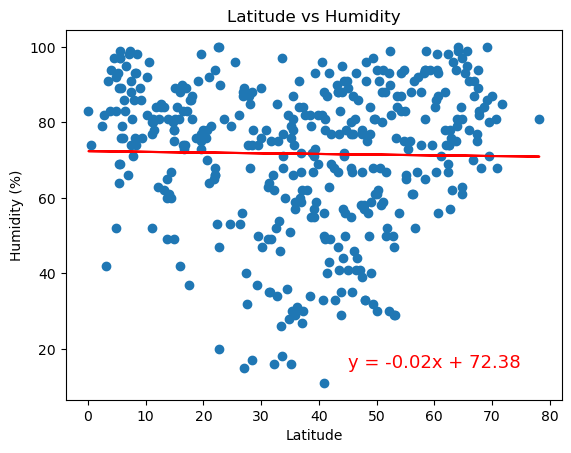

In [39]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=13,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0023774845573220787


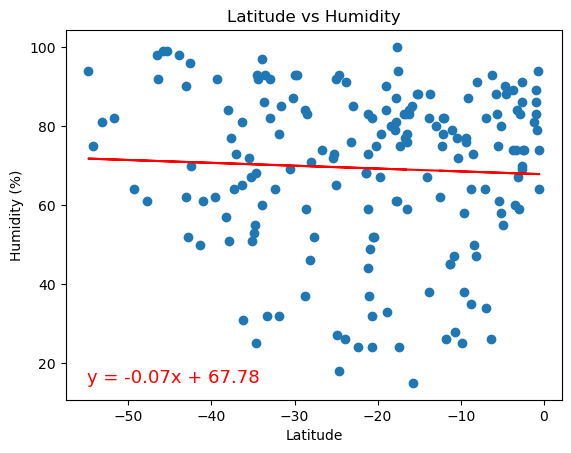

In [41]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=13,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Humidity is the same from south to north Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 5.954430149978491e-05


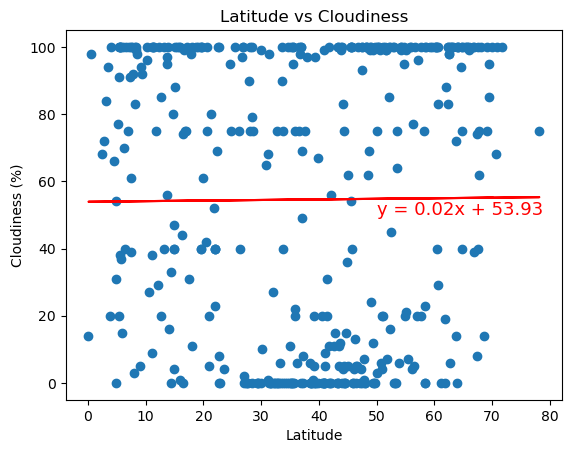

In [43]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=13,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 4.188791881963649e-05


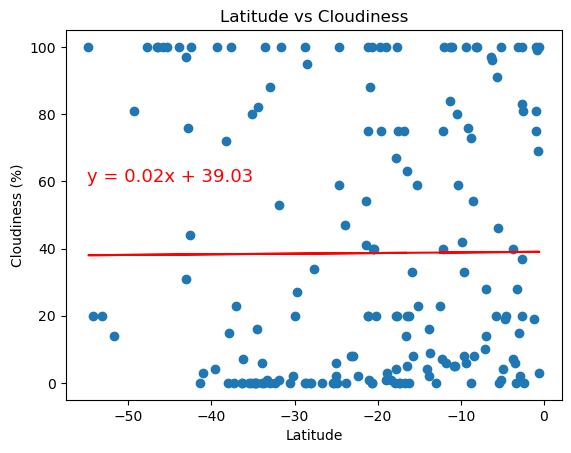

In [45]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=13,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The higher the Latitude, the more cloudy

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002789402460962994


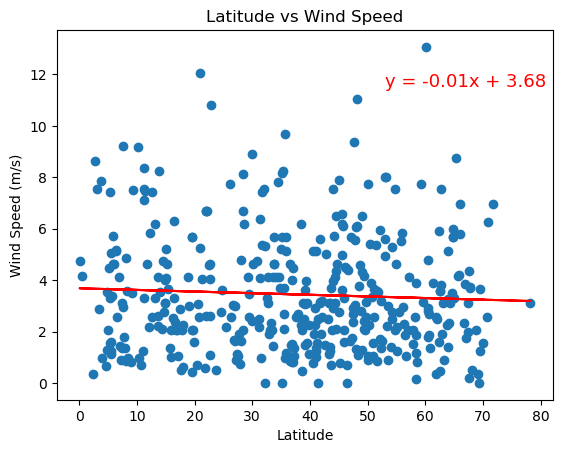

In [47]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,11.5),fontsize=13,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.027330816673795385


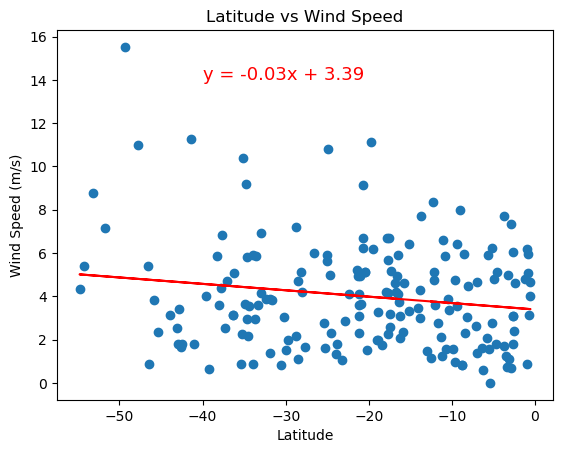

In [49]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,14),fontsize=13,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The lower the Latitude, the faster the Wind Speed